# Visualizations

In [1]:
import sys,os
import pandas as pd
from numpy import *
from matplotlib.pyplot import *
from matplotlib.patches import Rectangle
%matplotlib inline
from sklearn.metrics import pairwise_distances
import glob
from scipy.stats import pearsonr
ion()

In [2]:
os.getcwd()
os.chdir('/mnt/DATA/bQTL_mapping_rerun')

## Counts & Peaks Visualizations

### Number of Peaks

Text(0, 0.5, 'Frequency')

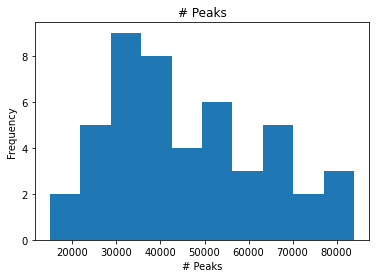

In [55]:
files = glob.glob('processed/PU1/counts/*.txt')
# print(files)
n_peaks = zeros((len(files)))
for k in range(len(files)):
    counts = pd.read_csv(files[k], sep='\t', header=1)
    n_peaks[k] = counts.shape[0]

# Plot histogram
hist(n_peaks)
title('# Peaks')
xlabel('# Peaks')
ylabel('Frequency')

### % Reads assigned to peaks

Text(0, 0.5, 'Frequency')

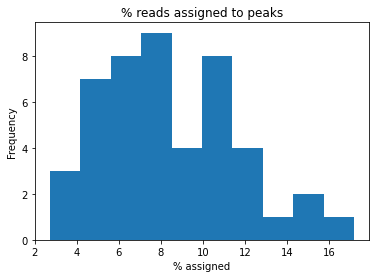

In [4]:
pct_assigned = zeros((len(files)))
for k in range(len(files)):
    counts = pd.read_csv(files[k] + '.summary', sep='\t', names = ['Status','Counts'], header=0)
    pct_assigned[k] = counts['Counts'][0]/counts['Counts'].sum()

# Plot histogram
hist(pct_assigned*100)
title('% reads assigned to peaks')
xlabel('% assigned')
ylabel('Frequency')

### % Reads assigned to consensus peaks

Text(0, 0.5, 'Frequency')

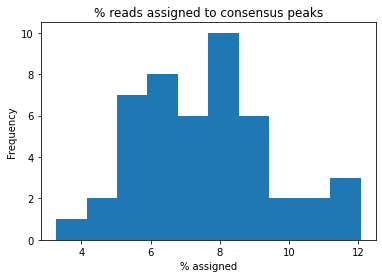

In [5]:
pct_assigned_con = zeros((len(files)))
for k in range(len(files)):
    counts = pd.read_csv(files[k].replace('counts','merged_counts').replace('no_duplicates.','') + '.summary', sep='\t', names = ['Status','Counts'], header=0)
    pct_assigned_con[k] = counts['Counts'][0]/counts['Counts'].sum()

# Plot histogram
hist(pct_assigned_con*100)
title('% reads assigned to consensus peaks')
xlabel('% assigned')
ylabel('Frequency')

### % reads assigned to consensus peaks vs # peaks

(0.7492998995859892, 1.3700496503163994e-09)

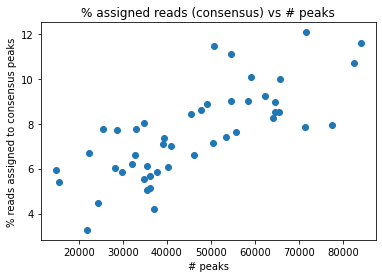

In [6]:
# are these correlated? maybe related to sample quality?
# Plot
scatter(n_peaks, pct_assigned_con*100)
title('% assigned reads (consensus) vs # peaks')
xlabel('# peaks')
ylabel('% reads assigned to consensus peaks')
pearsonr(n_peaks, pct_assigned_con)

### % reads assigned to peaks vs # peaks

(0.8941340338598125, 2.6181157211423774e-17)

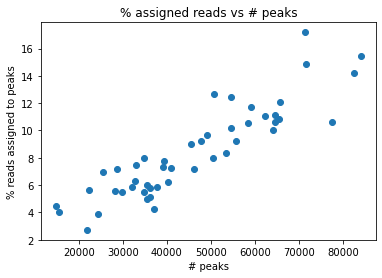

In [7]:
# Plot
scatter(n_peaks, pct_assigned*100)
title('% assigned reads vs # peaks')
xlabel('# peaks')
ylabel('% reads assigned to peaks')
pearsonr(n_peaks, pct_assigned)

## PCA Visualizations

### Genotype PCA - 1KG Samples

In [8]:
# Population PCA 
geno_PCA = pd.read_csv("1KG_PCA/chr1_50PCA.csv")

# NA07346 and NA11993 are missing genotype data (47 samples --> 45 samples)
sample_list = ["NA06985","NA06986","NA06994","NA07037","NA07048","NA07051","NA07056","NA07346","NA07357","NA10847",
               "NA10851","NA11829","NA11830","NA11831","NA11832","NA11840","NA11881","NA11894","NA11918","NA11920",
               "NA11931","NA11992","NA11993","NA11994","NA12005","NA12043","NA12154","NA12156","NA12234","NA12249",
               "NA12275","NA12282","NA12286","NA12287","NA12383","NA12489","NA12750","NA12760","NA12761","NA12762",
               "NA12763","NA12776","NA12812","NA12813","NA12814","NA12815","NA12873"]
donors_only = geno_PCA[geno_PCA['Unnamed: 0'].isin(sample_list)]

# Grab the first 2 PCs
pc_df = donors_only[['Unnamed: 0','0', '1']] # data frame (cols = sample names, PC1, PC2)
pc_arr = concatenate((pc_df['0'].values.reshape(-1, 1), 
                      pc_df['1'].values.reshape(-1, 1)),axis=1) # numpy array (samples (45) x PCs (2))

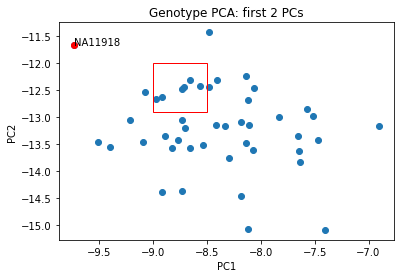

In [9]:
# Plot 
fig,ax = subplots(1)
ax.scatter(pc_df['0'],pc_df['1'])
title('Genotype PCA: first 2 PCs')
xlabel('PC1')
ylabel('PC2')

# NA11918 annotation (Others excluded this sample from their study)
annot = 'NA11918'
point = pc_df[pc_df['Unnamed: 0'].str.contains(annot)]
scatter(point['0'],point['1'],c='r')
annotate(annot,(point['0'],point['1']))

# Box to zoom in on (there are close points here)
rect = Rectangle((-9,-12),.5,-.9,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

In [10]:
# Investigate the top 5 closest pairs of samples
dist_matrix = pairwise_distances(pc_arr, metric='euclidean') # D[i,j] is distance between ith and jth
dist_array = unique(sort(dist_matrix[dist_matrix!=0]))       # sorted distance array
for k in range(5):
    pair = where(dist_matrix == dist_array[k])[0]
    print(pc_df['Unnamed: 0'].values[pair[0]], pc_df['Unnamed: 0'].values[pair[1]], sep=' & ')

NA11830 & NA11840
NA11881 & NA12275
NA12154 & NA12489
NA11832 & NA12234
NA10851 & NA12383


Text(1707   -8.913268
Name: 0, dtype: float64, 1707   -12.631518
Name: 1, dtype: float64, 'NA12275')

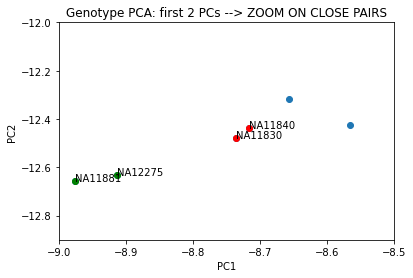

In [11]:
# Annotate the 2 closest pairs
scatter(pc_df['0'],pc_df['1'])
title('Genotype PCA: first 2 PCs --> ZOOM ON CLOSE PAIRS')
xlabel('PC1')
ylabel('PC2')
xlim(-9,-8.5)
ylim(-12.9,-12)

# NA11830 & NA11840
annot = 'NA11830'
point = pc_df[pc_df['Unnamed: 0'].str.contains(annot)]
scatter(point['0'],point['1'],c='r')
annotate(annot,(point['0'],point['1']))
annot = 'NA11840'
point = pc_df[pc_df['Unnamed: 0'].str.contains(annot)]
scatter(point['0'],point['1'],c='r')
annotate(annot,(point['0'],point['1']))

# NA11881 & NA12275
annot = 'NA11881'
point = pc_df[pc_df['Unnamed: 0'].str.contains(annot)]
scatter(point['0'],point['1'],c='g')
annotate(annot,(point['0'],point['1']))
annot = 'NA12275'
point = pc_df[pc_df['Unnamed: 0'].str.contains(annot)]
scatter(point['0'],point['1'],c='g')
annotate(annot,(point['0'],point['1']))

### Genotype PCA - 45 sample, QTLTools

In [54]:
# Phenotype PCA
genotype_PCA = pd.read_csv("processed/PU1/qtltools/input/cqn/PU1.geno_pca.pca", sep = " ")
print(genotype_PCA.columns)
genotype_PCA = genotype_PCA.drop(columns=['SampleID'])

# Grab the first 2 PCs
pc_arr_g = concatenate((genotype_PCA.iloc[0].values.reshape(-1, 1), 
                      genotype_PCA.iloc[1].values.reshape(-1, 1)),axis=1) # numpy array (samples (45) x PCs (2))


Index(['SampleID', 'NA06985', 'NA06986', 'NA06994', 'NA07037', 'NA07048',
       'NA07051', 'NA07056', 'NA07357', 'NA10847', 'NA10851', 'NA11829',
       'NA11830', 'NA11831', 'NA11832', 'NA11840', 'NA11881', 'NA11894',
       'NA11918', 'NA11920', 'NA11931', 'NA11992', 'NA11994', 'NA12005',
       'NA12043', 'NA12154', 'NA12156', 'NA12234', 'NA12249', 'NA12275',
       'NA12282', 'NA12286', 'NA12287', 'NA12383', 'NA12489', 'NA12750',
       'NA12760', 'NA12761', 'NA12762', 'NA12763', 'NA12776', 'NA12812',
       'NA12813', 'NA12814', 'NA12815', 'NA12873'],
      dtype='object')


Text(0, 0.5, 'PC2')

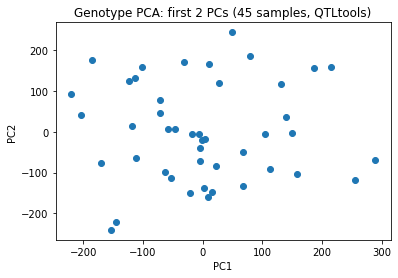

In [18]:
# Plot 
fig,ax = subplots(1)
ax.scatter(pc_arr_g[:,0],pc_arr_g[:,1])
title('Genotype PCA: first 2 PCs (45 samples, QTLtools)')
xlabel('PC1')
ylabel('PC2')

Text(0.5, 0, 'PCs')

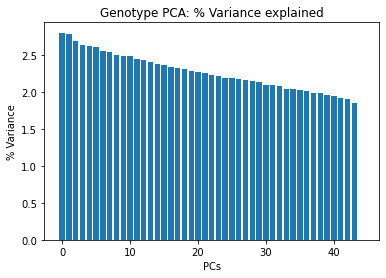

In [47]:
# % Variance explained
g_pca_stats = pd.read_csv("processed/PU1/qtltools/input/cqn/PU1.geno_pca.pca_stats", sep=" ", header=None, index_col=0)
g_pca_stats = g_pca_stats.drop(labels=['#Kaiser','#Thresh995'],axis=0)
g_prop_var = asarray(g_pca_stats.iloc[1][0:45]).astype(float)

bar(range(len(g_prop_var)),g_prop_var*100)
title('Genotype PCA: % Variance explained')
ylabel('% Variance')
xlabel('PCs')

### Comparing the 2 Genotype PCAs

Text(0, 0.5, 'PC1: 1KG PCA')

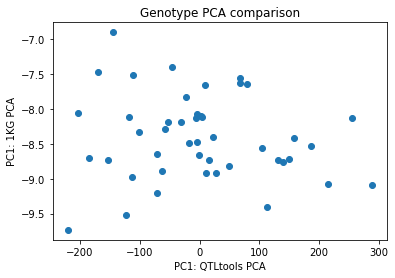

In [49]:
# Plot
fig,ax = subplots(1)
ax.scatter(pc_arr_g[:,0],pc_df['0'])
title('Genotype PCA comparison')
xlabel('PC1: QTLtools PCA')
ylabel('PC1: 1KG PCA')

### Phenotype PCA

In [12]:
# Phenotype PCA
phenotype_PCA = pd.read_csv("processed/PU1/qtltools/input/cqn/PU1.pheno_pca.pca", sep = " ")
phenotype_PCA = phenotype_PCA.drop(columns=['SampleID'])

# Grab the first 2 PCs
pc_arr_p = concatenate((phenotype_PCA.iloc[0].values.reshape(-1, 1), 
                      phenotype_PCA.iloc[1].values.reshape(-1, 1)),axis=1) # numpy array (samples (45) x PCs (2))


Text(0, 0.5, 'PC2')

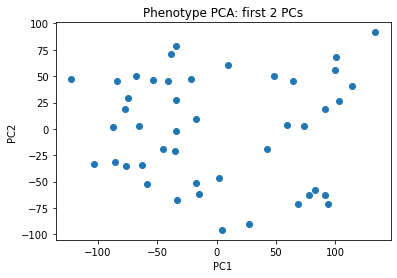

In [13]:
# Plot 
fig,ax = subplots(1)
ax.scatter(pc_arr_p[:,0],pc_arr_p[:,1])
title('Phenotype PCA: first 2 PCs')
xlabel('PC1')
ylabel('PC2')

Text(0.5, 0, 'PCs')

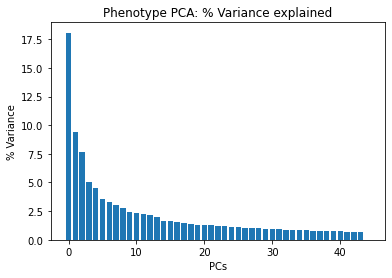

In [46]:
# Variance explained
p_pca_stats = pd.read_csv("processed/PU1/qtltools/input/cqn/PU1.pheno_pca.pca_stats", sep=" ", header=None, index_col=0)
p_pca_stats = p_pca_stats.drop(labels=['#Kaiser','#Thresh995'],axis=0)
prop_var = asarray(p_pca_stats.iloc[1][0:45]).astype(float)

bar(range(len(prop_var)),prop_var*100)
title('Phenotype PCA: % Variance explained')
ylabel('% Variance')
xlabel('PCs')

### Genotype & Phenotype PCA
PC0 from genotype and phenotype PCAs

Text(0, 0.5, 'PC1 Genotype')

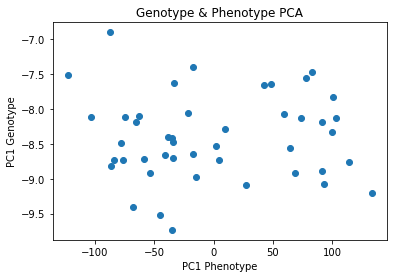

In [15]:
# Plot 
fig,ax = subplots(1)
ax.scatter(pc_arr_p[:,0],pc_df['0'])
title('Genotype & Phenotype PCA')
xlabel('PC1 Phenotype')
ylabel('PC1 Genotype')